In [1]:
import pandas as pd
import numpy as np
import os
import sys

In [2]:
TRAIN_PATH = './data/train'

In [3]:
def listFiles():
    map_dir_files = {}
    for d in os.listdir(TRAIN_PATH):
        d = os.path.join(TRAIN_PATH,d)
        if os.path.isdir(d):
            files = os.listdir(d)
            map_dir_files [d] = files
            sys.stderr.writelines("Nb files for %s: %d \n" % (d, len(files)))
    return map_dir_files

In [4]:
map_dir_files = listFiles()

Nb files for ./data/train\ALB: 1719 
Nb files for ./data/train\BET: 200 
Nb files for ./data/train\DOL: 117 
Nb files for ./data/train\LAG: 67 
Nb files for ./data/train\NoF: 465 
Nb files for ./data/train\OTHER: 299 
Nb files for ./data/train\SHARK: 176 
Nb files for ./data/train\YFT: 734 


In [5]:
from PIL import Image
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [6]:
def plot_graph(dico, fish, nbfiles, nbcolumns):
    files = os.listdir(fish)
    nblines = int(nbfiles / nbcolumns)
    fig, ax = plt.subplots(nrows=nblines, ncols=nbcolumns, figsize=(15,15))
    ax = ax.flatten()
   
    for i in range(0,nbfiles):
        f = random.choice(files)
        img = Image.open(os.path.join(fish,f))
        ax[i].imshow(img)
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        ax[i].set_title("%s h:%s w:%s" % (f, img.height,img.width))
    plt.tight_layout()

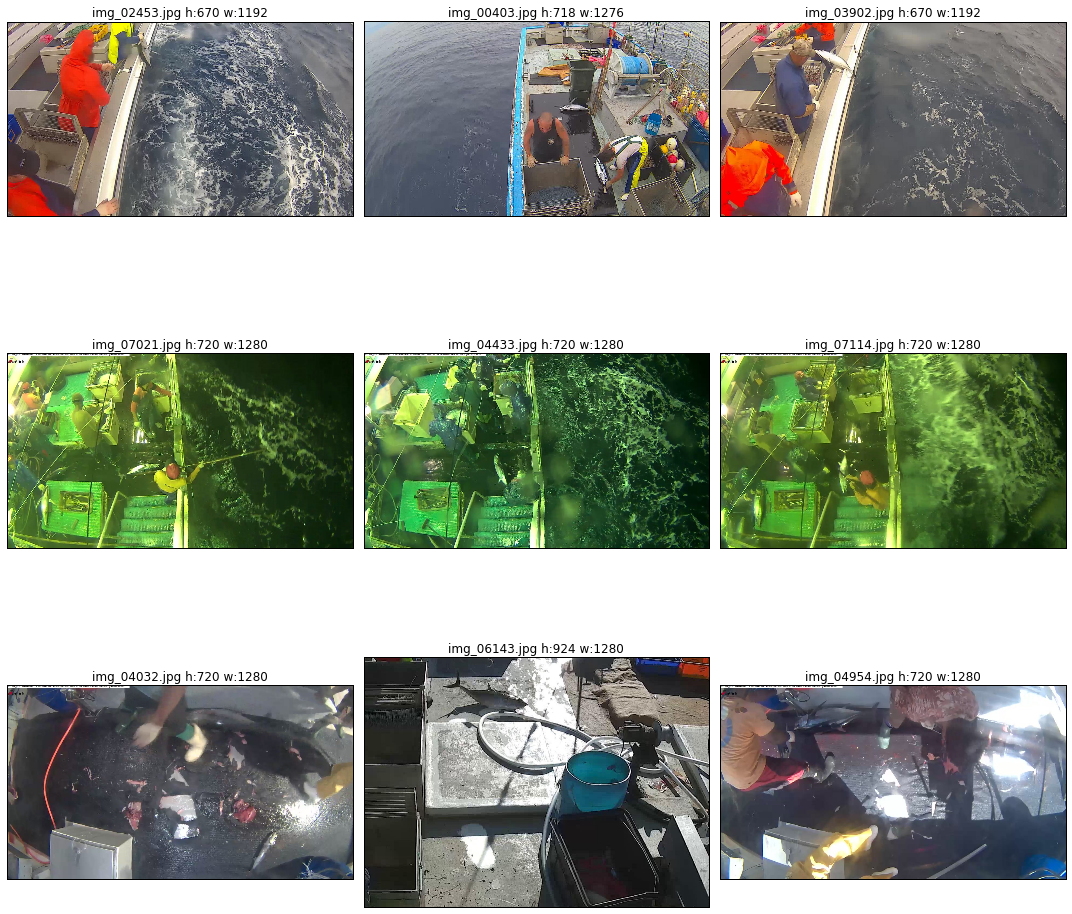

In [7]:
plot_graph(map_dir_files, os.path.join(TRAIN_PATH,'ALB'), 9, 3 )

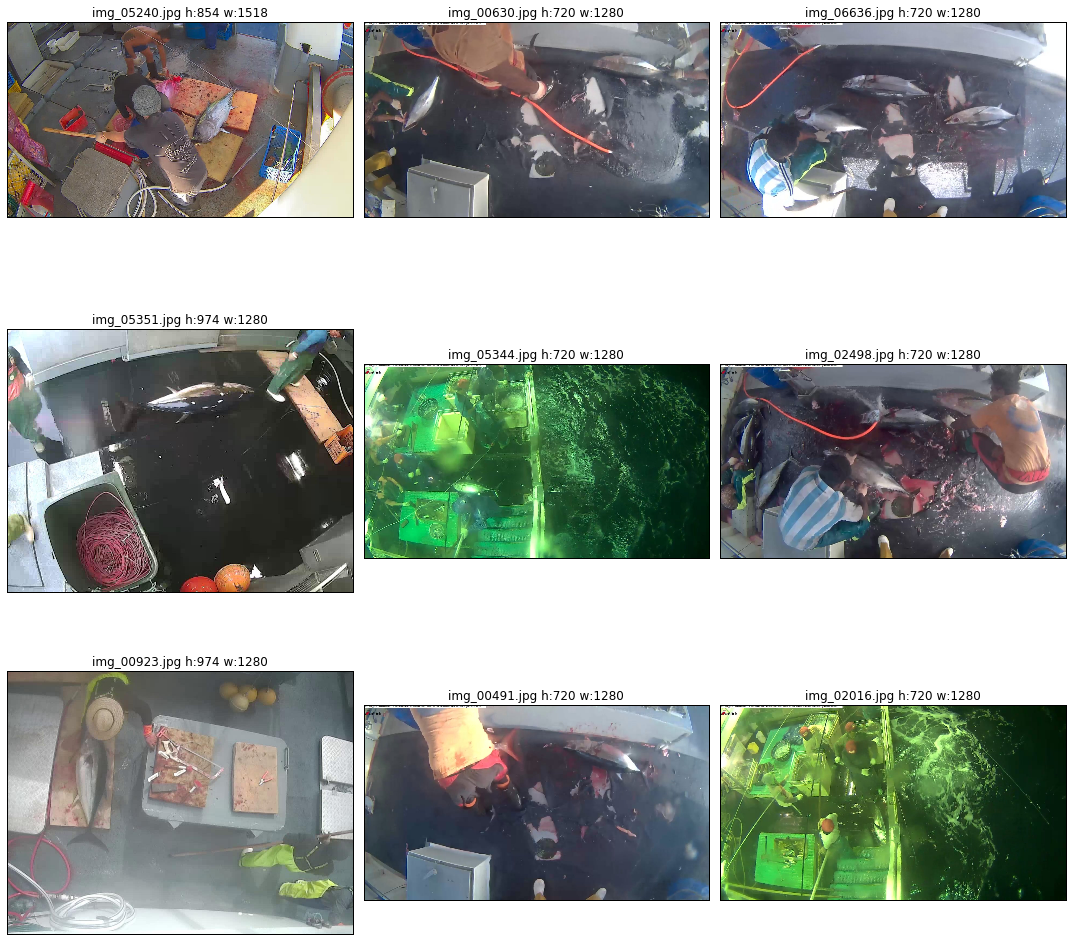

In [8]:
plot_graph(map_dir_files, os.path.join(TRAIN_PATH,'BET'), 9, 3 )

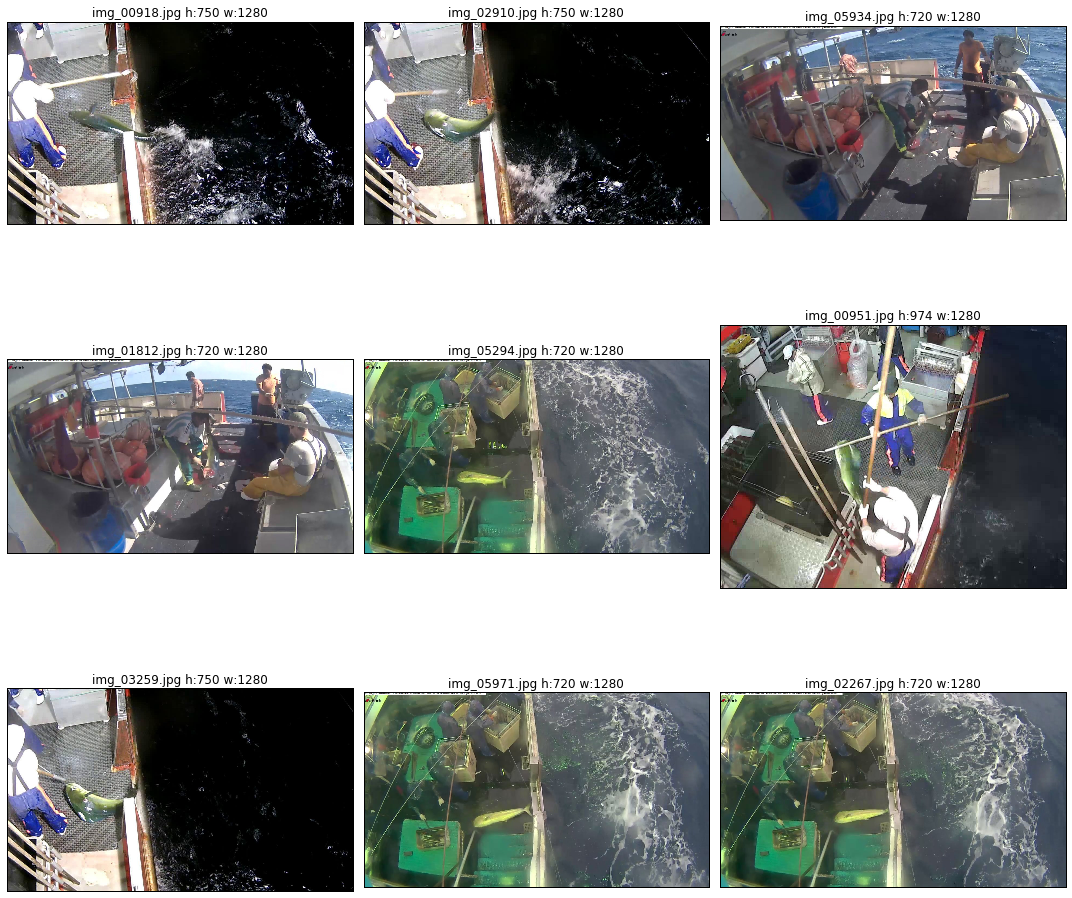

In [9]:
plot_graph(map_dir_files, os.path.join(TRAIN_PATH,'DOL'), 9, 3 )

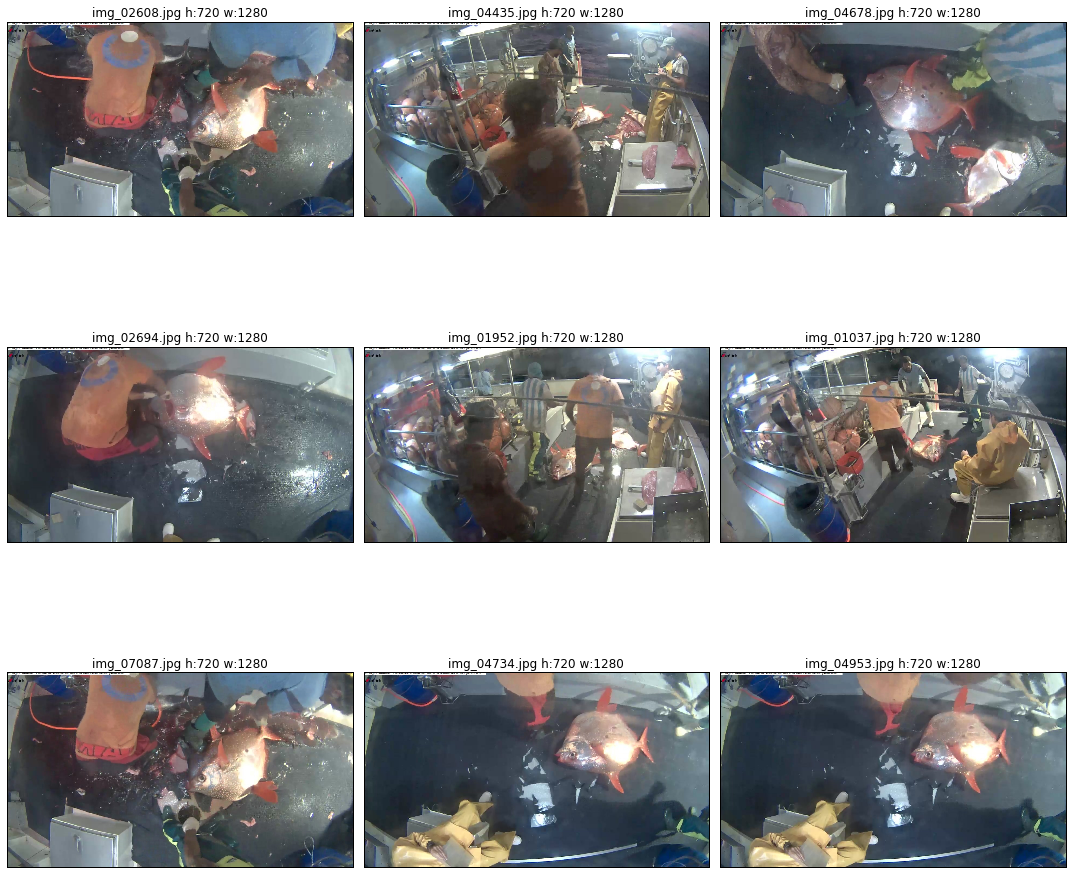

In [10]:
plot_graph(map_dir_files, os.path.join(TRAIN_PATH,'LAG'), 9, 3 )

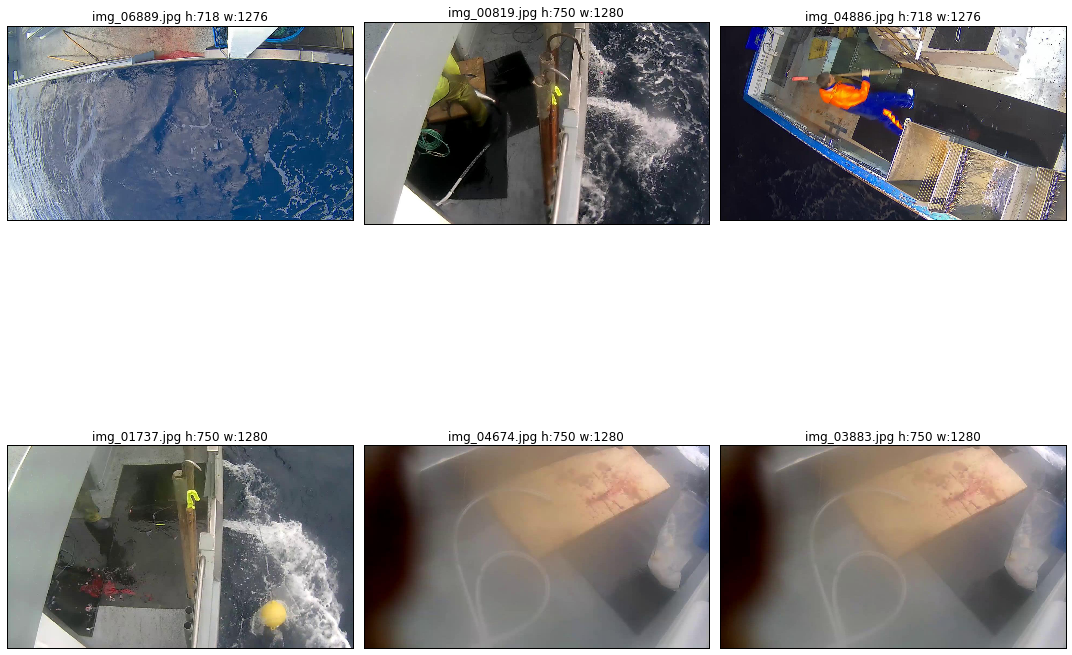

In [11]:
plot_graph(map_dir_files, os.path.join(TRAIN_PATH,'Nof'),6, 3 )

In [12]:
def get_all_files(root_dir):
    list_files = []
    for root, subdirs, files in os.walk(root_dir):
            list_files.extend([os.path.join(root,f) for f in files])
    return list_files

In [13]:
%time list_files = get_all_files(TRAIN_PATH)
list_files

Wall time: 1.21 s


['./data/train\\ALB\\img_00003.jpg',
 './data/train\\ALB\\img_00010.jpg',
 './data/train\\ALB\\img_00012.jpg',
 './data/train\\ALB\\img_00015.jpg',
 './data/train\\ALB\\img_00019.jpg',
 './data/train\\ALB\\img_00020.jpg',
 './data/train\\ALB\\img_00029.jpg',
 './data/train\\ALB\\img_00032.jpg',
 './data/train\\ALB\\img_00037.jpg',
 './data/train\\ALB\\img_00038.jpg',
 './data/train\\ALB\\img_00039.jpg',
 './data/train\\ALB\\img_00041.jpg',
 './data/train\\ALB\\img_00043.jpg',
 './data/train\\ALB\\img_00045.jpg',
 './data/train\\ALB\\img_00055.jpg',
 './data/train\\ALB\\img_00057.jpg',
 './data/train\\ALB\\img_00074.jpg',
 './data/train\\ALB\\img_00085.jpg',
 './data/train\\ALB\\img_00090.jpg',
 './data/train\\ALB\\img_00097.jpg',
 './data/train\\ALB\\img_00110.jpg',
 './data/train\\ALB\\img_00121.jpg',
 './data/train\\ALB\\img_00130.jpg',
 './data/train\\ALB\\img_00134.jpg',
 './data/train\\ALB\\img_00136.jpg',
 './data/train\\ALB\\img_00154.jpg',
 './data/train\\ALB\\img_00156.jpg',
 

In [14]:
np_files = np.array(list_files)
%time shapes = [Image.open(f).size for f in list_files]

Wall time: 1min 57s


In [15]:
import pandas as pd

In [16]:
pd.Series(shapes).value_counts()

(1280, 720)    2174
(1280, 750)     598
(1280, 974)     395
(1276, 718)     220
(1192, 670)     198
(1280, 924)      60
(1518, 854)      39
(1732, 974)      35
(1334, 750)      31
(1244, 700)      27
dtype: int64

## Training

In [18]:
#conda install -c https://conda.binstar.org/menpo opencv3
import cv2
print cv2.__version__

3.1.0


In [77]:
def build_X_y(files):
    X = []
    y = []
    
    for i,im in enumerate(files):
        fish = str.split(os.path.dirname(im), os.sep)[-1]
        if i%500 == 0:
            sys.stderr.writelines("file:%s y:%s  %d/%d \n" % (im.title(), fish, i ,len(files)))
            sys.stderr.flush()
        
        im = cv2.imread(im,cv2.IMREAD_COLOR)
        im = cv2.resize(im, (160,90), interpolation=cv2.INTER_CUBIC)
        X.append(np.array(im))
        y.append(fish)
    return X,y

In [79]:
%time X,y = build_X_y(list_files)

file:./Data/Train\Alb\Img_00003.Jpg y:ALB  0/3777 
file:./Data/Train\Alb\Img_02263.Jpg y:ALB  500/3777 
file:./Data/Train\Alb\Img_04683.Jpg y:ALB  1000/3777 
file:./Data/Train\Alb\Img_07078.Jpg y:ALB  1500/3777 
file:./Data/Train\Dol\Img_05446.Jpg y:DOL  2000/3777 
file:./Data/Train\Nof\Img_06610.Jpg y:NoF  2500/3777 
file:./Data/Train\Shark\Img_06082.Jpg y:SHARK  3000/3777 
file:./Data/Train\Yft\Img_04918.Jpg y:YFT  3500/3777 


Wall time: 3min 32s


In [80]:
print(y)

['ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB'

In [81]:
from sklearn.preprocessing import LabelEncoder
y=LabelEncoder().fit_transform(y)

In [82]:
print(y)

[0 0 0 ..., 7 7 7]


In [83]:
#conda install -c https://conda.anaconda.org/conda-forge keras
from keras.utils import np_utils
y = np_utils.to_categorical(y)

ImportError: No module named keras.utils

In [ ]:
y_all

In [ ]:
np.ndarray((4, 90, 160, 3),dtype=np.uint8)

In [ ]:
import cv2

['./data/train\\BET',
 './data/train\\LAG',
 './data/train\\NoF',
 './data/train\\ALB',
 './data/train\\SHARK',
 './data/train\\YFT',
 './data/train\\OTHER',
 './data/train\\DOL']

In [66]:
v = str.split('./data/train\\BET', os.sep)
v[-1]

'BET'

In [ ]:
#https://www.kaggle.com/jeffd23/the-nature-conservancy-fisheries-monitoring/deep-learning-in-the-deep-blue-lb-1-279
#https://www.kaggle.com/narae78/the-nature-conservancy-fisheries-monitoring/fish-detection
#https://www.kaggle.com/andrelopes1705/the-nature-conservancy-fisheries-monitoring/lasagne-based-of-zfturbo-keras-code/code